<a href="https://colab.research.google.com/github/deepakpatle757/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank Stock Closing Price Prediction**    

##### **Project Type**    - Regression
##### **Contribution**    - Individual (Dipak Patle)


# **Project Summary -**

Yes Bank was a very reputed bank till 2018. After 2018, the bank came under the umbrella of risk inflated banks because of the fraud case by Rana kapoor. This project would help not only yes bank but to all those banks who want to predict their future and are in conundrum for their future. So Machine Learning is helping us to resolve the issue of all those companies and firms who want to gather some courage in order to survive in the market for a longer time. By predicting the price with the acquaintance of Machine Learning especially the linear Regression and other regressors, which helped firms and companies to sustain in the market. In this project the monthly Open,Close,Low and High prices of Yes Bank stock have helped to train the model on which learning occurred and then the respective prediction occurs.

**GitHub Link -** https://github.com/deepakpatle757/Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time Series models or any other predictive models can do justice to such situations. This Dataset has monthly stock prices of the bank since its inception and includes closing, opening, highest and lowest stock prices of every month. The main objective is to predict the closing stock price of the month.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

###Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
yes_bank_df = pd.read_csv('/content/drive/My Drive/data_YesBank_StockPrices.csv')

### Dataset first view

In [4]:
yes_bank_df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [5]:
yes_bank_df.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


###Dataset Rows and Columns

In [6]:
yes_bank_df.shape

(185, 5)

###Dataset information

In [7]:
yes_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
yes_bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


###Duplicate Values


In [9]:
yes_bank_df[yes_bank_df.duplicated()]

print("Number of Duplicates values:",len(yes_bank_df[yes_bank_df.duplicated()]))

Number of Duplicates values: 0


#### Missing Values/Null Values

In [10]:
yes_bank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

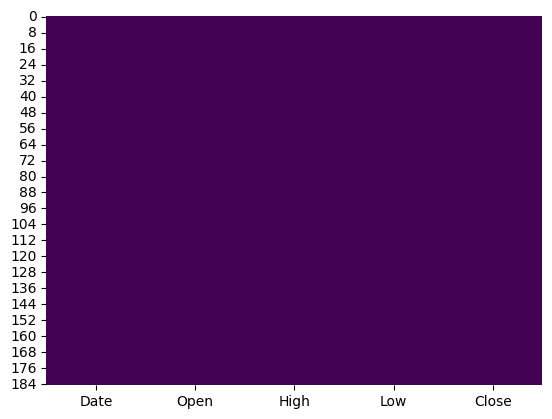

In [11]:
#visualizing the missing values
sns.heatmap(yes_bank_df.isnull(),cmap = 'viridis',cbar=False)

### What did you know about your dataset?

**The given dataset of yesbank has 185 rows and 5 Columns/Features in which we have the target label/dependent variable- "close"{i.e. we have to predict the closing stock price} with help of our independent variable i.e.- "Date", "open", "High", "Low".There are no null and duplicate values in the dataset."Date" feature have object datatype which will be converted in datetime datatype in further process.**

## ***2. Understanding Your Variables***

In [12]:
yes_bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
yes_bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Variables Description**

In the given dataset there are 185 rows and 5 features,Features description are as follows-

**Date-**: Date denotes the date of investment(date contains month and year for a particular price.)

**Open-**: It is the price at which a stock started trading.

**High-**: It is the highest price at which a stock is traded during a period.

**Low-**: It is the minimum price at which a stock is traded during a period.

**Close-**: The closing price refers to a stock's trading price closed at the end of a trading day .It's a dependent variable that we need to predict from our respective ML models.The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

#### check unique values of columns

In [14]:
for column in yes_bank_df.columns:
  unique_values = yes_bank_df[column].unique()

  print(f"Unique values for {column}:{unique_values}")

Unique values for Date:['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 

In [15]:
yes_bank_df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

In [16]:
yes_bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
yes_bank_df['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [18]:
yes_bank_df['Date'] = yes_bank_df['Date'].apply(lambda x:datetime.strptime(x,"%b-%y"))

In [19]:
yes_bank_df.head(10)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [20]:
yes_bank_df.set_index('Date',inplace=True)

In [21]:
yes_bank_df.head(10)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
2005-12-01,13.49,14.44,13.00,13.71
2006-01-01,13.68,17.16,13.58,15.33
2006-02-01,15.50,16.97,15.40,16.12
2006-03-01,16.20,20.95,16.02,20.08


###What all manipulations have you done and insights you found?

**The given dataset has 185 rows and 5 columns/features having no null and duplicates values.'Date' Feature is not in proper format so it is converted to 'datetime' format and make it to the Index of the dataframe as per our need to proceed further.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart-1

<ipython-input-22-344d097d0042>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yes_bank_df['Close'],color="y")


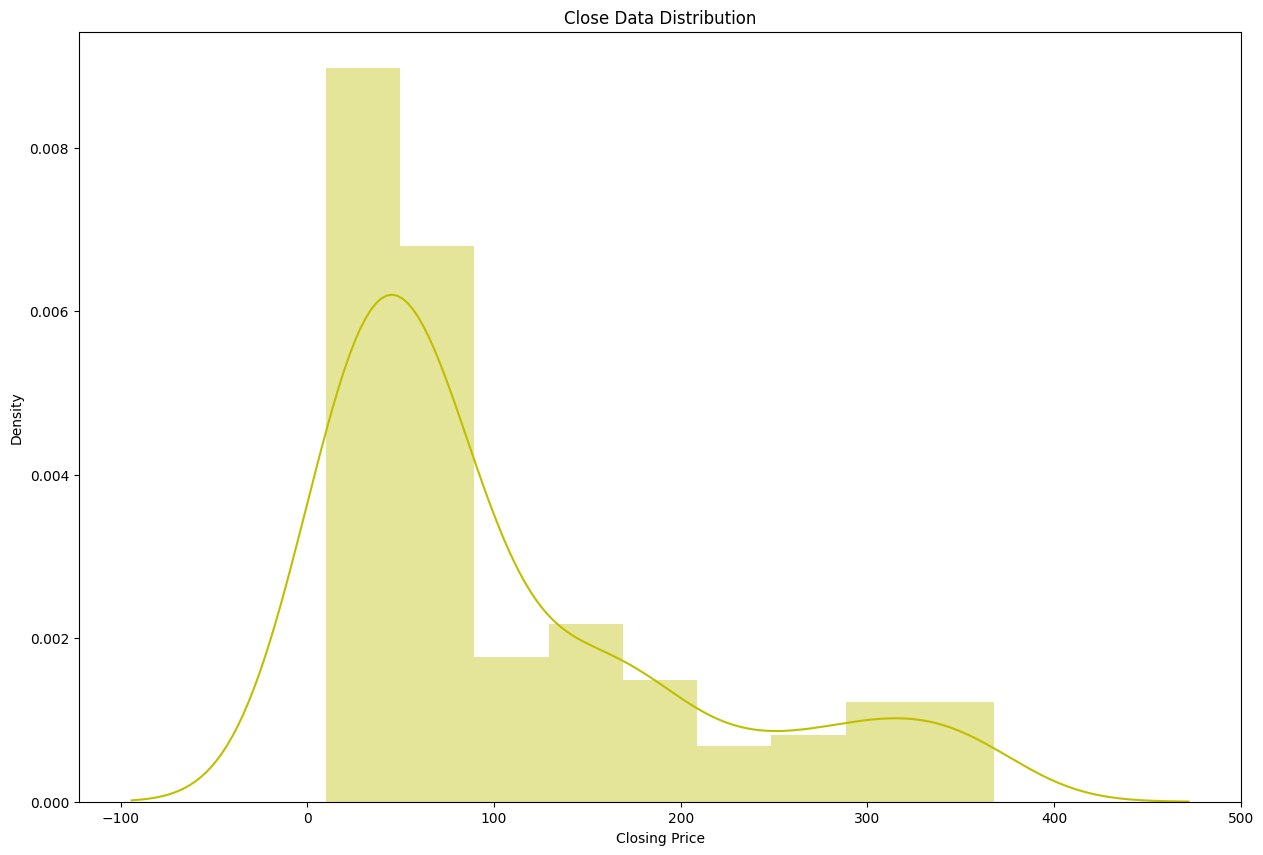

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(yes_bank_df['Close'],color="y")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

I have picked the above chart because it combines both histogram and kde plot that offers a comprehensive visualization of the data distribution. It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clearly visualize that it is right/positively skewed and has to be converted to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Currently can't say that it has a positive or negative impact but it is helpful to understand and decide upon the requirement of transformation of the features for Model implementation.Here we will use log transformation to convert it into normal distribution.

####Chart-2

<ipython-input-23-81513c3a9b0a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(yes_bank_df['Close']),color="y")


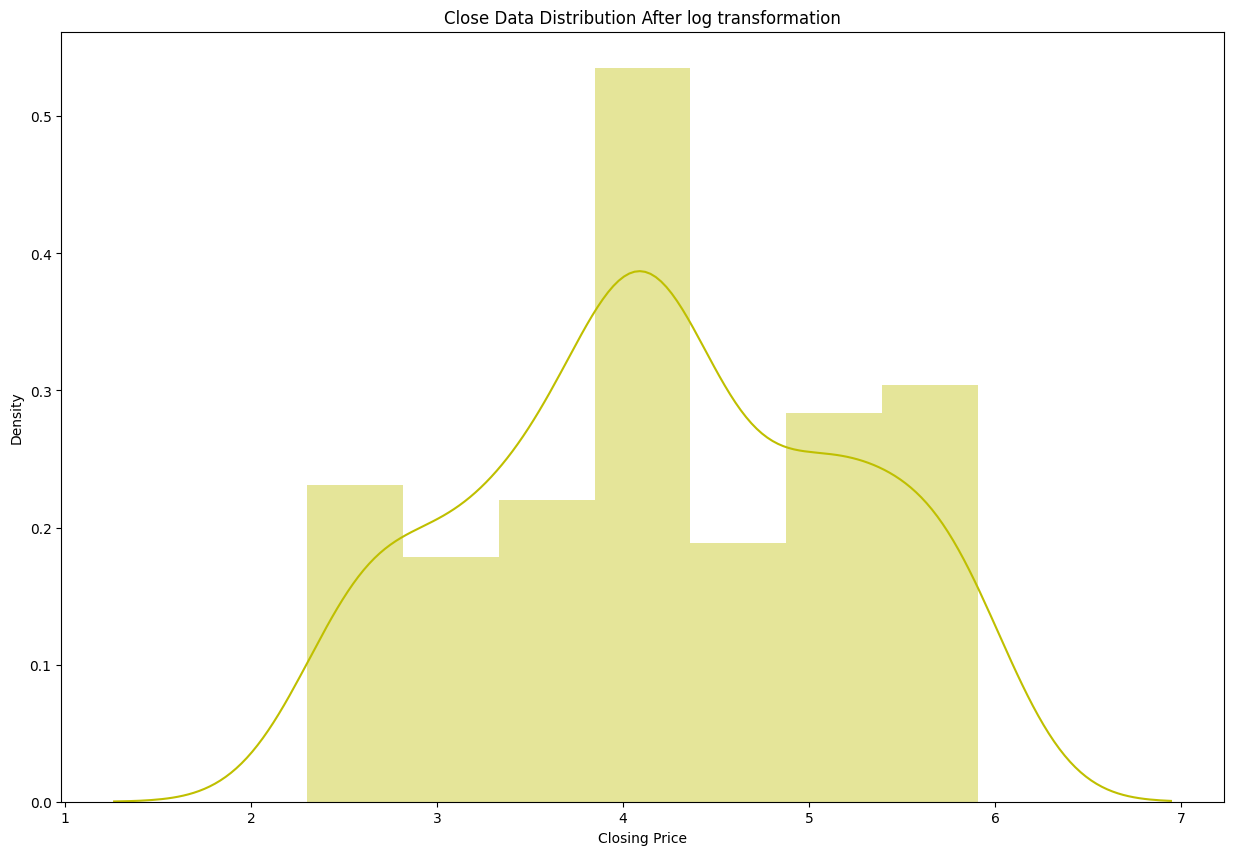

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(np.log(yes_bank_df['Close']),color="y")
plt.title('Close Data Distribution After log transformation')
plt.xlabel('Closing Price')
plt.show()

### 1. Why did you pick the specific chart?

I have used the log transformation because the distribution is not much skewed, and log transformation is helpful to bring the normal pattern in distribution of dependent feature.Beacuse of the Log transformation outliners are removed.

### 2. What is/are the insight(s) found from the chart?

Log transformation is sufficient to bring the noraml distribution.It shows the mean is pumped and the frequent points are not near to mean. The plot clarifies about the bubble price of Yes Bank stock remained for very less time.

### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

It helps to observe the peak and vallyes in closing stock price.The inflated price at mean is temporary as it is a bubble point and after this the price got decline tremendously because of the fraud case which happened in 2018.

####Chart-3

In [24]:
data_features = yes_bank_df[['Open','High','Low']]

<ipython-input-25-ee1c0de81e28>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature,color='blue')
<ipython-input-25-ee1c0de81e28>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature,color='blue')
<ipython-input-25-ee1c0de81e28>:5: UserWarning: 

`distplot` is a deprecated function and 

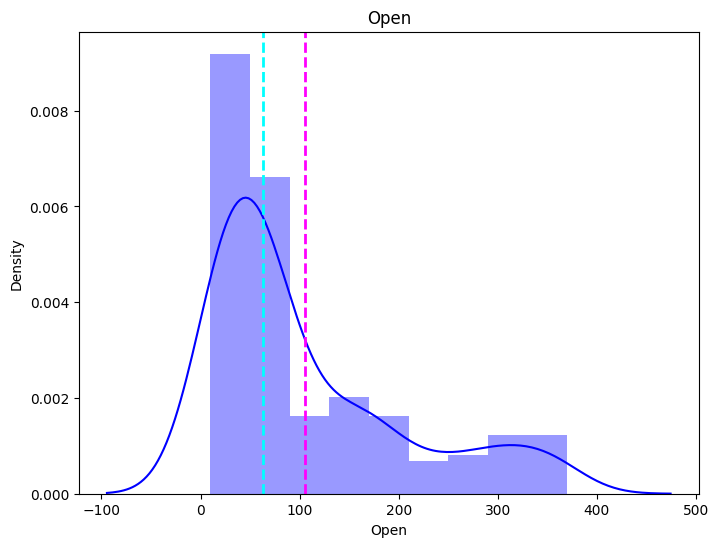

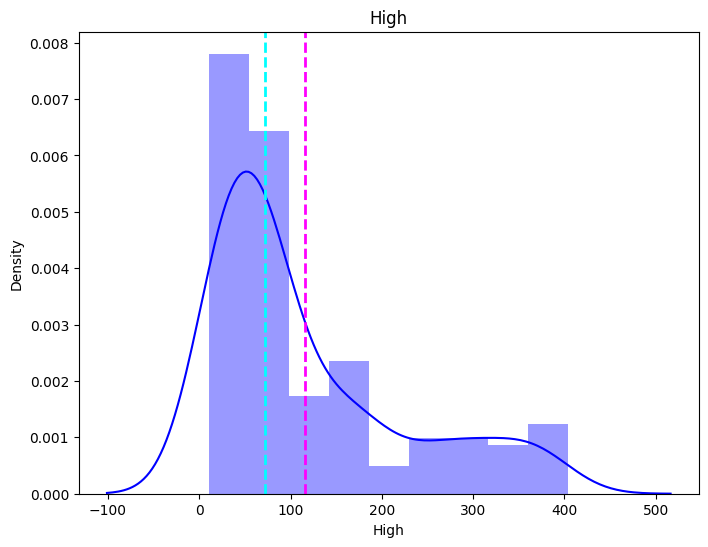

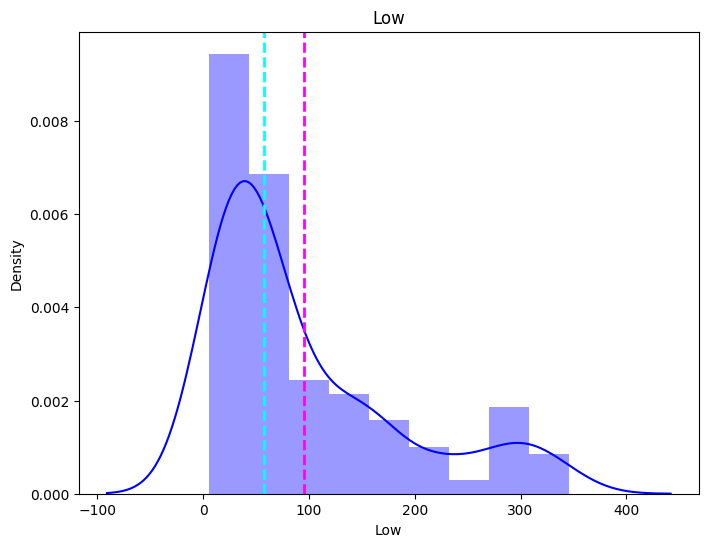

In [25]:
for cols in data_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature = yes_bank_df[cols]
  sns.distplot(feature,color='blue')
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(cols)

plt.show()

##### 1. Why did you pick the specific chart?

I have picked the above chart because it combines histogram and kde that offers a comprehensive visualization of the data distribution and. It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clearly visualize that it is right/positively skewed and has to be converted to normal distribution and by converting it to normal distribution outliners can be removed.

##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

Currently can't say that it has a positive or negative impact but it is helpful to understand and decide upon the requirement of transformation of the features for Model implementation.Here we will use log transformation to convert it into normal distribution and to remove outliner.

####Chart-4

In [26]:
data_features_log = np.log(yes_bank_df[['Open','High','Low']])

<ipython-input-27-458ccf2933a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature,color='blue')
<ipython-input-27-458ccf2933a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature,color='blue')
<ipython-input-27-458ccf2933a0>:5: UserWarning: 

`distplot` is a deprecated function and 

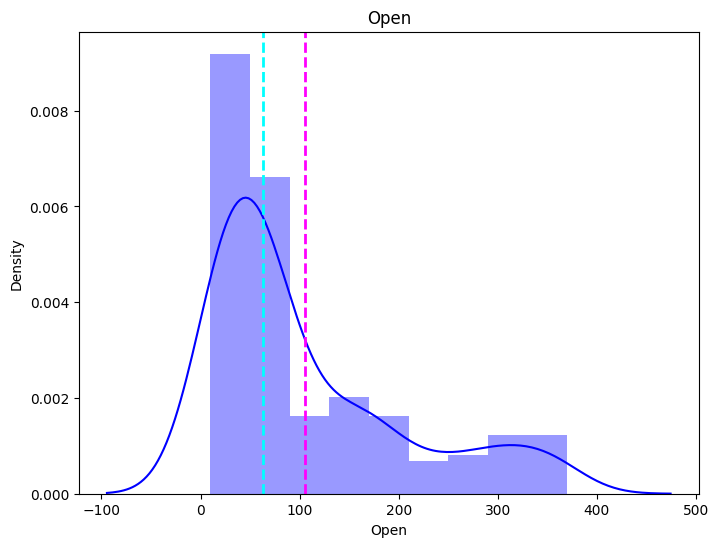

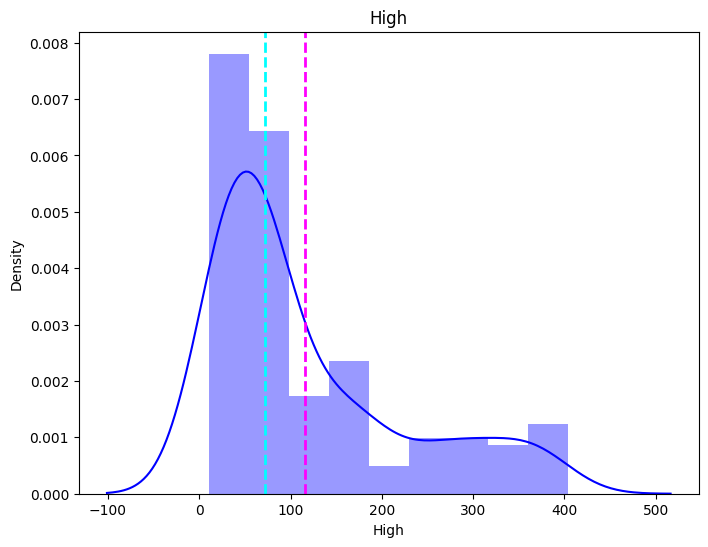

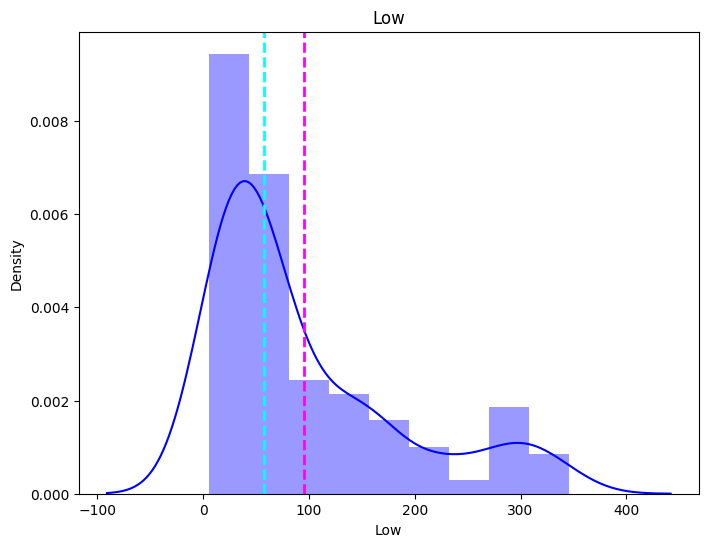

In [27]:
for cols in data_features_log:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature = yes_bank_df[cols]
  sns.distplot(feature,color='blue')
  ax.axvline(feature.mean(),color='magenta',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan',linestyle='dashed',linewidth=2)
  ax.set_title(cols)

plt.show()

##### 1. Why did you pick the specific chart?

have used the log transformation because the distribution is not much skewed, and log transformation is helpful to bring the normal pattern in distribution of dependent feature.Beacuse of the Log transformation outliners are removed.

##### 2. What is/are the insight(s) found from the chart?

Log transformation is sufficient to bring the noraml distribution.The plot clarifies about the bubble price of Yes Bank stock remained for very less time.we can see from the distribution curve that mean is now closer median.

##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

It helps to observe the peak and vallyes in stock prices.The inflated price at mean is temporary as it is a bubble point and after this the price got decline tremendously because of the fraud case which happened in 2018.

####Chart-5

[Text(0.5, 1.0, 'Yes Bank closing price'), Text(0.5, 0, 'Year')]

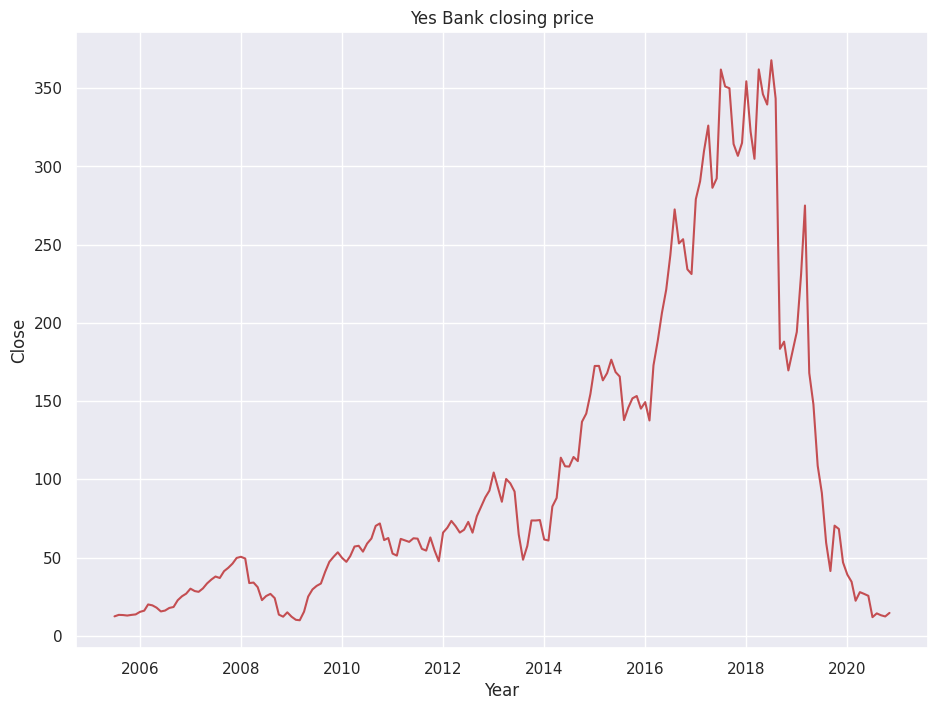

In [28]:
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot(x="Date", y="Close",data=yes_bank_df,color='r').set(title='Yes Bank closing price',xlabel='Year')


##### 1. Why did you pick the specific chart?

Line plot is used to show the progression of a variable over time or any continuous variable that has an inherent order. They are particularly useful for visualizing trends, seasonality, and changes in values over time.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can easily see that price has increasing trend from 2009-2108 but after 2018 there is sudden drop in the prices because of the fraud case involving Rana Kapoor.



##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

As we know the stock closing price serves as a benchmark for determining how a stock performs and also help investors comprehend how its value has changed over time.From the above plot it is seen that stock closing price diminishes continously after 2018 ,so it is alarming for the yes bank to cope with this situation as closing price is that one price which drives investors to invest in a stock or not.So, as per scnerio the insights have a negative impact on business, but by observing the trend they must try to restrict the stock manipulation to become stable in terms of revenue.

####Chart-6

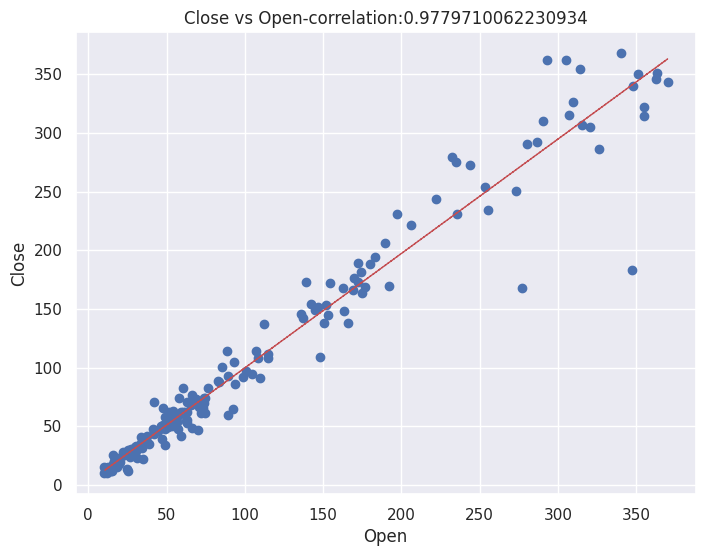

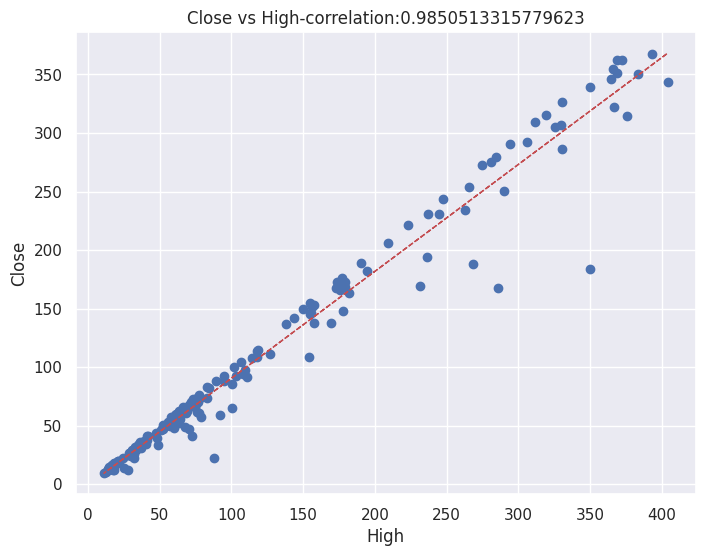

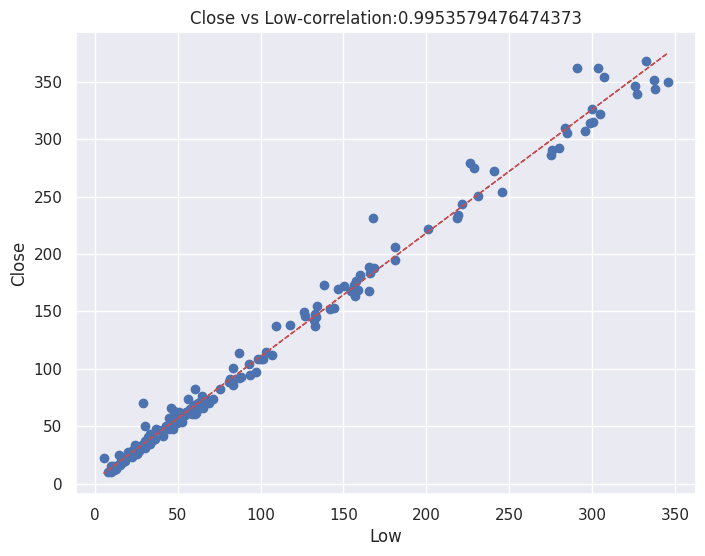

In [29]:
for cols in data_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature = yes_bank_df[cols]
  label = yes_bank_df['Close']
  correlation = feature.corr(label)
  plt.scatter(x =feature,y=label)
  plt.xlabel(cols)
  plt.ylabel('Close')
  ax.set_title('Close vs' +' '+ cols + '-correlation:'+ str(correlation))
  z = np.polyfit(yes_bank_df[cols],yes_bank_df['Close'],1)
  y_hat = np.poly1d(z)(yes_bank_df[cols])
  plt.plot(yes_bank_df[cols],y_hat,'r--',lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is used because it is easy to visualize the relationship between two variables.They help you understand if there is any correlation or pattern between the variables.Scatter plots are useful for assessing the strength and direction of the relationship between two variables. By examining the overall pattern of the data points, we can determine if there is a positive correlation (both variables increase together), negative correlation (one variable increases while the other decreases), or no correlation between the variables.

##### 2. What is/are the insight(s) found from the chart?


From the above plot it is visible that dependent variable is highly related to all independent variables which is a good sign while implementing the models.

##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights have a positive correlation between independent and dependent variables which is a plus for our models but we have to be cautious about the multicollinearity and try to merge the features or drop them to rectify the multicollinearity which will ultimately increases the model accuracy.

####Chart-8

<Axes: >

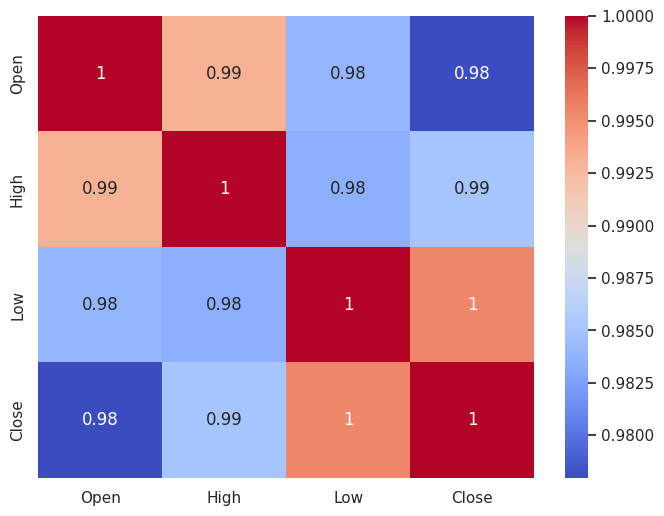

In [30]:
fig = plt.figure(figsize=(8,6))
correlation = yes_bank_df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are used to visually represent data in a matrix form where each cell's color is determined by its value. Heatmaps are commonly used in data visualization to represent patterns or relationships in data, and to identify areas of high and low values or activity.Heatmap consists of small square boxes having a numeric value known as correlation coefficient.A correlation coefficient is a statistical measure that indicates the strength and direction of a linear relationship between two variables. A correlation coefficient of 0 indicates no linear relationship between the two variables, while a correlation coefficient of 1 indicates a perfect positive linear relationship (i.e., as one variable increases, the other variable increases by a constant proportion). A correlation coefficient of -1 indicates a perfect negative linear relationship (i.e., as one variable increases, the other variable decreases by a constant proportion).

##### 2. What is/are the insight(s) found from the chart?

From the above plot,it is very significant that there is high collinearity.Each and every feature is correlated with every other feature.(i.e. Multicollinearity)

##### 3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights are useful to understand and get an idea about the collinearity of the features so that we could deal with it in future model implentation.

## ***6. Feature Engineering & Data Pre-processing***

#### Handling Null Values

In [31]:
yes_bank_df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

###What all missing value imputation techniques have you used and why did you use those techniques?

As we can with the help of above code, there is no missing values in the dataset.

###Handling Outliers

In [32]:
yes_bank_df1 = yes_bank_df.iloc[:,0:].copy()

In [33]:
yes_bank_df1.head(10)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
2005-12-01,13.49,14.44,13.00,13.71
2006-01-01,13.68,17.16,13.58,15.33
2006-02-01,15.50,16.97,15.40,16.12
2006-03-01,16.20,20.95,16.02,20.08


In [34]:
Q1 = yes_bank_df1.quantile(0.25)
Q3 = yes_bank_df1.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 0.75*IQR
upper_bound = Q3 + 0.75*IQR

yes_bank_df1[(yes_bank_df1 < lower_bound) | (yes_bank_df1 > upper_bound)] = np.nan

# Replace null values with median
median = yes_bank_df1.median()
yes_bank_df1 = yes_bank_df1.fillna(median)

In [35]:
yes_bank_df1.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Firstly I went with log transformation of features in the visualization part where transformation to the data can sometimes help to normalize the distribution and reduce the impact of outliers.This transformation can make the data more suitable for analysis while minimizing the effect of extreme values but it is not the most robust method to deal with outliers.

Secondly, I came up with Interquartile Range (IQR) method which is a robust statistical method in which I replaced the outliers of all feature with its respective median so that the distribution do not drastically change and should not be affected by the outliers.

###Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data Transformation is required and I have used log transformation(np.log) for the data which is given. The reasons behind the transformation are as follows-

Data which is given is right skewed so to make the distribution normal and symmetric transforamtion is required which will help to implement model correctly and pricesly which help us to reach towards desired accuracy.
After treating outliers the correltion b/w independent and dependent variable got distorted so to restore that, transformation is required and as we can see from the above heatmap the correlation are restored which will make our model more accurate for prediction, but it has multicollinearity and to deal with it we have to drop that feature which is least correlated with the target variable, but by doing so we lose the valuable information as our dataset is small, so we continue with the multicollinearity and check how our model behaves with this phenomena.

In [36]:
yes_bank_df1['Close'] = np.log(yes_bank_df1['Close'])
yes_bank_df1['Open'] = np.log(yes_bank_df1['Open'])
yes_bank_df1['High'] = np.log(yes_bank_df1['High'])
yes_bank_df1['Low'] = np.log(yes_bank_df1['Low'])

<Axes: >

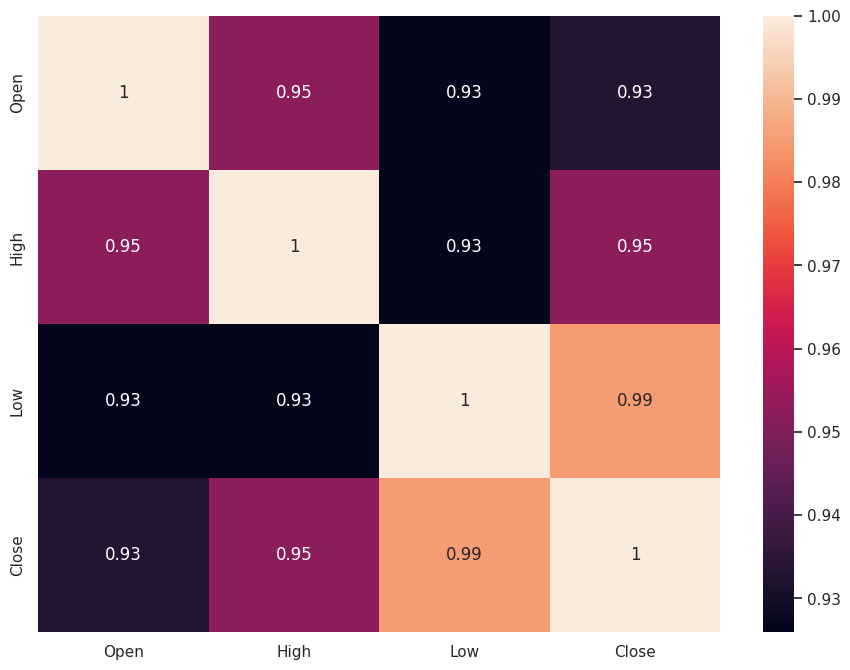

In [37]:
## Checking the correlation b/w independent and dependent variable that it is restored or not, after data transformation.
cor_log=yes_bank_df1.corr()
sns.heatmap(cor_log,annot=True)

###Feature Selection

In [38]:
independant_variable = [i for i in yes_bank_df1.columns if i not in ['Close']]
dependant_variable = 'Close'

##### What all feature selection methods have you used  and why?

'Open', 'High', 'Low' are Important features as they contain maximum information which will be very helpful for prediction.

###Data Splitting

In [39]:
x = yes_bank_df1[independant_variable].values
y = yes_bank_df1[dependant_variable].values

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape,y_train.shape

((148, 3), (148,))

In [42]:
x_test.shape,y_test.shape

((37, 3), (37,))

##### What data splitting ratio have you used and why?

For the Data spliting, the 20% data has been splitted as test data. As the data is already very small 20 % would be enough to test upon the training model.

###Data scaling

In [43]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I have used Standard and MinMax Scaler to scale the data.The reason to use scaling is that it provides benefits in terms of algorithm performance, convergence speed, and interpretability.

## ***7. ML Model Implementation***

### ML Model - 1

In [44]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [45]:
reg.intercept_

2.027894227930071

In [46]:
reg.coef_

array([-0.82929393,  1.59494098,  2.72236332])

In [47]:
y_test_pred = reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

we will find that linear regression is used in everything from biological,
behavioral,financial and stocks, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.


In [48]:
train_accuracy = reg.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_test_pred)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_test_pred), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_test_pred)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_test_pred), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_test_pred), 4))


Train accuracy is  0.9857099053945527
 Test accuracy is  0.929552396351328
MSE value : 0.0405
RMSE value : 0.2012
MAE value : 0.1314
MAPE value : 0.0353


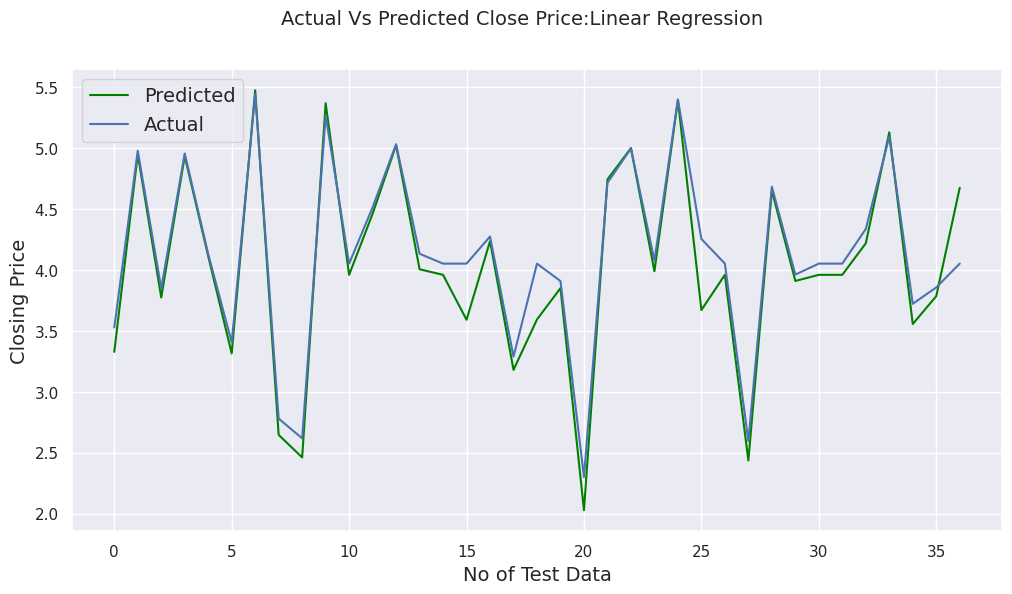

In [49]:
plt.figure(figsize=(12,6))
plt.plot((y_test_pred),color='green')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Linear Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

### ML Model - 2

In [50]:
lasso = Lasso(alpha=0.00001)
lasso.fit(x_train,y_train)

Lasso(alpha=1e-05)

In [51]:
y_pred_lasso = lasso.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it does not give much of an idea but there are 2 key words here – absolute and selection.

Lasso regression performs **L1 regularization**, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

Here, α (alpha) provides a trade-off between balancing RSS and magnitude of coefficients.α can take various values. Lets iterate it here briefly:

1.α = 0: Same coefficients as simple linear regression.

2.α = ∞: All coefficients zero (same logic as before).

3.0 < α < ∞: coefficients between 0 and that of simple linear regression.

In [52]:
train_accuracy = lasso.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_lasso)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))

Train accuracy is  0.9857095935965405
 Test accuracy is  0.9300224746450992
MSE value : 0.0402
RMSE value : 0.2005
MAE value : 0.1311
MAPE value : 0.0353


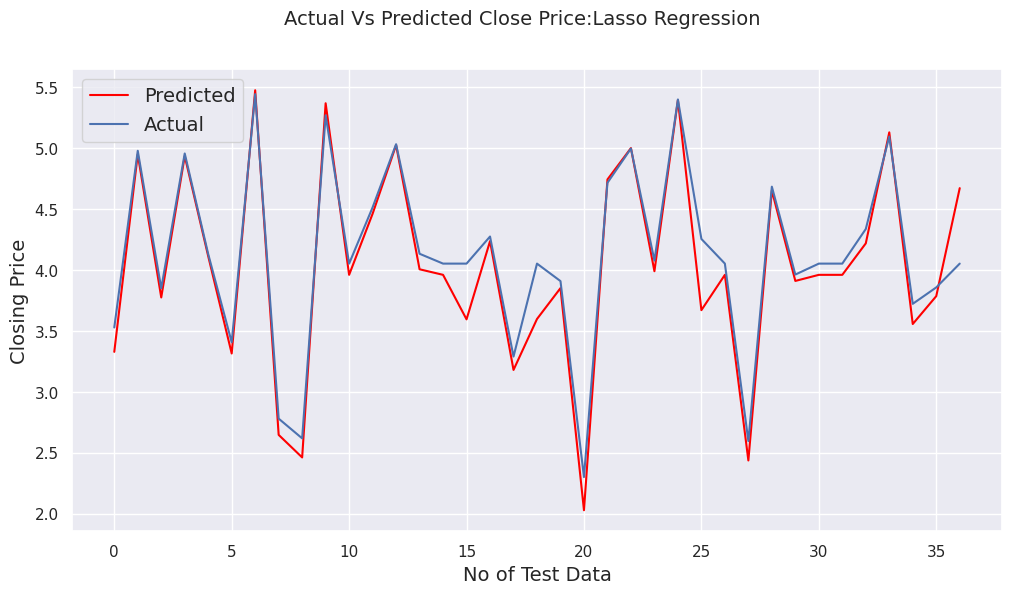

In [53]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_lasso),color='red')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Lasso Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**2. Cross- Validation & Hyperparameter Tuning of Lasso Regularization**

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [54]:
lasso_cv = Lasso()

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_cv, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e-01, tolerance: 5.165e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.508e-02, tolerance: 5.165e-03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [55]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.011570847758111256


In [56]:
lasso_best=Lasso(alpha = 0.001)
lasso_best.fit(x_train,y_train)

Lasso(alpha=0.001)

In [57]:
y_pred_best=lasso_best.predict(x_test)

In [58]:
train_accuracy = lasso_best.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_best)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_best), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_best)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_best), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_best), 4))

Train accuracy is  0.9828836044057128
 Test accuracy is  0.9573993534983593
MSE value : 0.0245
RMSE value : 0.1565
MAE value : 0.1038
MAPE value : 0.0284


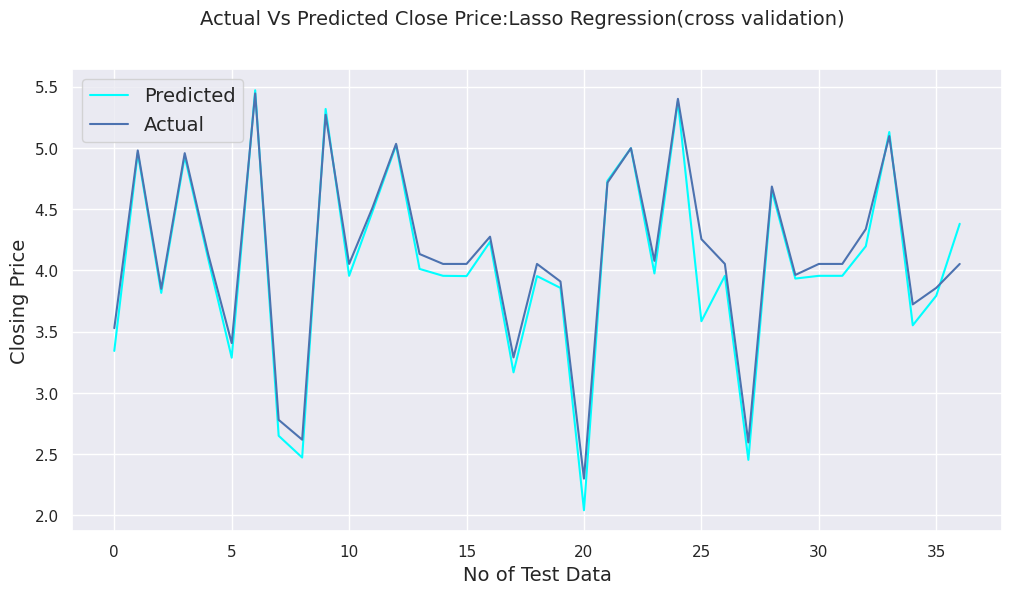

In [59]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_best),color='aqua')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Lasso Regression(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the normal Lasso regulariztion the accuracy for train and test is 97% and 94% respectively with RMSE- 0.2211

But after cross validation with new value of alpha, the train and test accuracy become 96% and 93% respectively with RMSE- 0.2297

There is decrease in training as well as testing accuracy after cross-validation,this means model approaches towards slightly generalized fitting.

### ML Model - 3

In [60]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [61]:
y_pred_ridge= ridge.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge regression performs **L2 regularization**, i.e. it adds a factor to sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1. **α = 0**:

1.The objective becomes same as simple linear regression.
2.We’ll get the same coefficients as simple linear regression.

2. **α = ∞**:

1.The coefficients will be zero because of infinite weightage on square of
2.coefficients, anything less than zero will make the objective infinite.

3. **0 < α < ∞**:

1.The magnitude of α will decide the weightage given to different parts of objective.
2.The coefficients will be somewhere between 0 and ones for simple linear regression.

I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression.

In [62]:
train_accuracy = ridge.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_ridge)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_ridge), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))

Train accuracy is  0.968800903153521
 Test accuracy is  0.9676874544797827
MSE value : 0.0186
RMSE value : 0.1363
MAE value : 0.0896
MAPE value : 0.0227


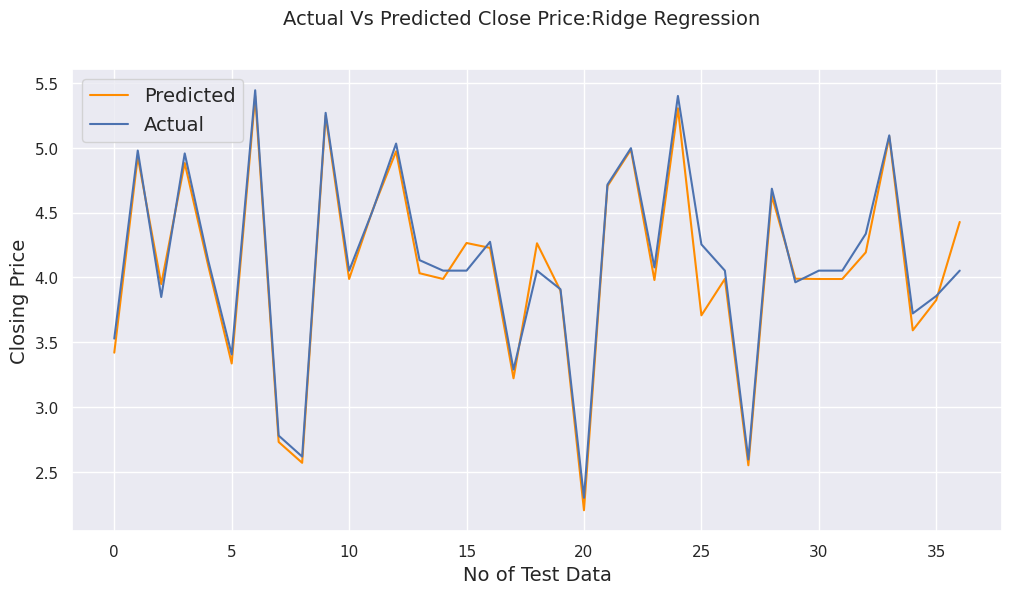

In [63]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_ridge),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**2. Cross- Validation & Hyperparameter Tuning of Ridge Regularization**

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [64]:
Ridge_cv = Ridge()

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(Ridge_cv, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [65]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -0.010406062972500173


In [66]:
ridge_best=Ridge(alpha = 0.1)
ridge_best.fit(x_train,y_train)

Ridge(alpha=0.1)

In [67]:
y_pred_eidge_best = ridge_best.predict(x_test)

In [68]:
train_accuracy = ridge_best.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_eidge_best)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_eidge_best), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_eidge_best)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_eidge_best), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_eidge_best), 4))

Train accuracy is  0.9843501417631088
 Test accuracy is  0.9530572039539702
MSE value : 0.027
RMSE value : 0.1642
MAE value : 0.1097
MAPE value : 0.0297


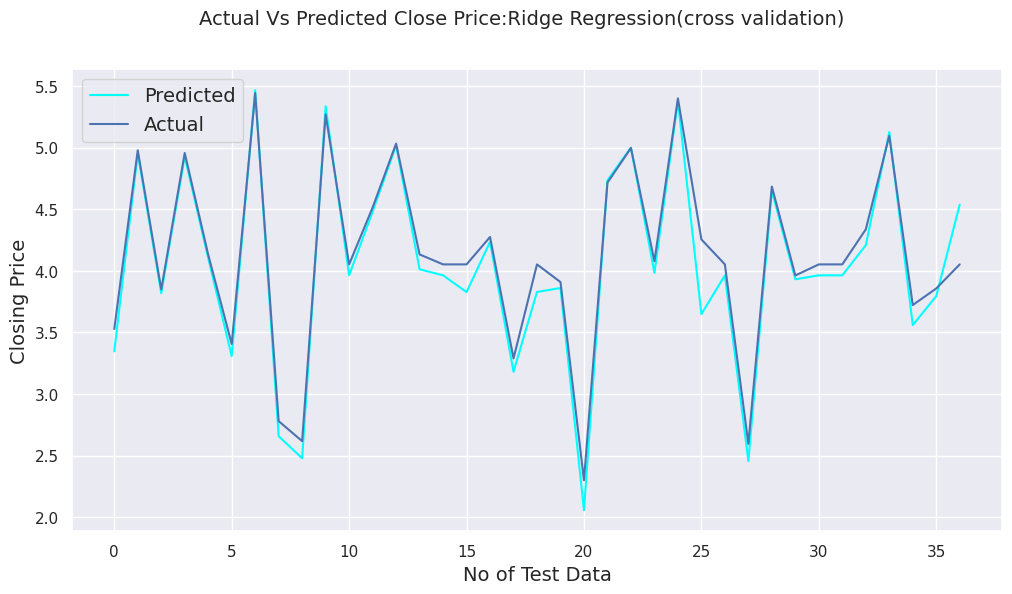

In [69]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_eidge_best),color='aqua')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the normal Ridge regulariztion the accuracy for train and test is 98% and 92% respectively with RMSE- 0.2012


But after cross validation with new value of alpha, the train acuuracy remains same but the test accuracy is increased to 95% respectively with RMSE- 0.1642



### ML Model - 4

In [70]:
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [71]:
y_pred_elastic = elastic.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Elastic Net is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties

In [72]:
train_accuracy = elastic.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_elastic)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_elastic), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_elastic), 4))

Train accuracy is  0.750287057629186
 Test accuracy is  0.775781929583206
MSE value : 0.1288
RMSE value : 0.3589
MAE value : 0.2872
MAPE value : 0.0737


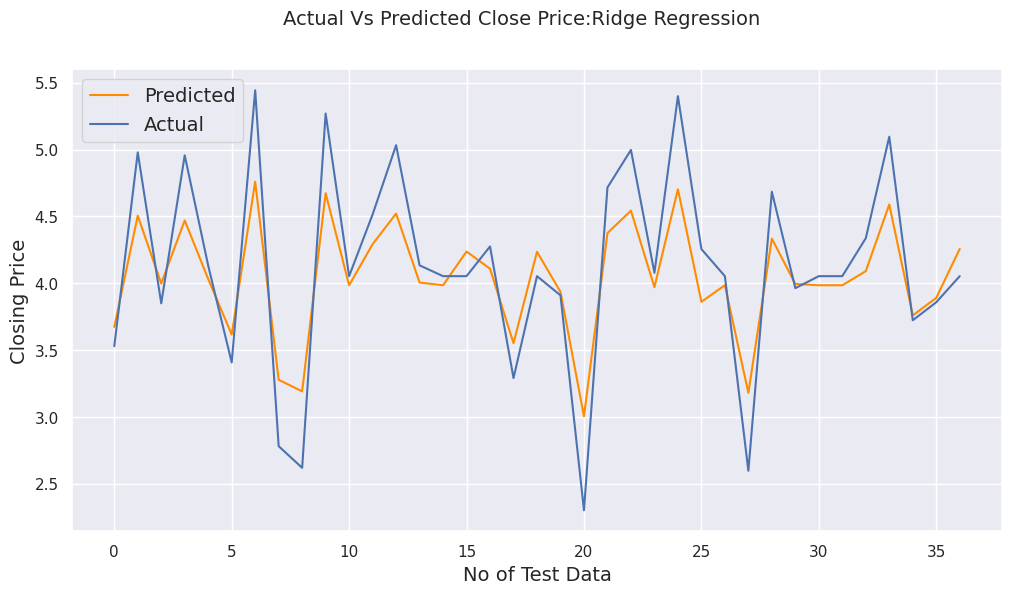

In [73]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_elastic),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**2. Cross- Validation & Hyperparameter Tuning of Ridge Regularization**

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.

In [74]:
elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-7,1e-6,1e-3,1e-1,0,1,3,5,7,9,10,20,30,40,45,50,60,70,80,90,100],
              'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

elastic_regressor = GridSearchCV(elastic,parameters,scoring = 'neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e-01, tolerance: 6.403e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e-01, tolerance: 6.403e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e-01, tolerance: 6.403e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-07, 1e-06,
                                   0.001, 0.1, 0, 1, 3, 5, 7, 9, 10, 20, 30, 40,
                                   45, 50, 60, 70, 80, 90, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [75]:
elastic_regressor.best_params_

{'alpha': 0.001, 'l1_ratio': 0.3}

In [76]:
elastic_net = ElasticNet(alpha=0.001,l1_ratio=0.3)

In [77]:
elastic_net.fit(x_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.3)

In [78]:
y_pred_elastic_hyp = elastic_net.predict(x_test)

In [79]:
train_accuracy = elastic_net.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_elastic_hyp)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_elastic_hyp), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_hyp)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_elastic_hyp), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_elastic_hyp), 4))

Train accuracy is  0.983381244160802
 Test accuracy is  0.9577064555334001
MSE value : 0.0243
RMSE value : 0.1559
MAE value : 0.1033
MAPE value : 0.028


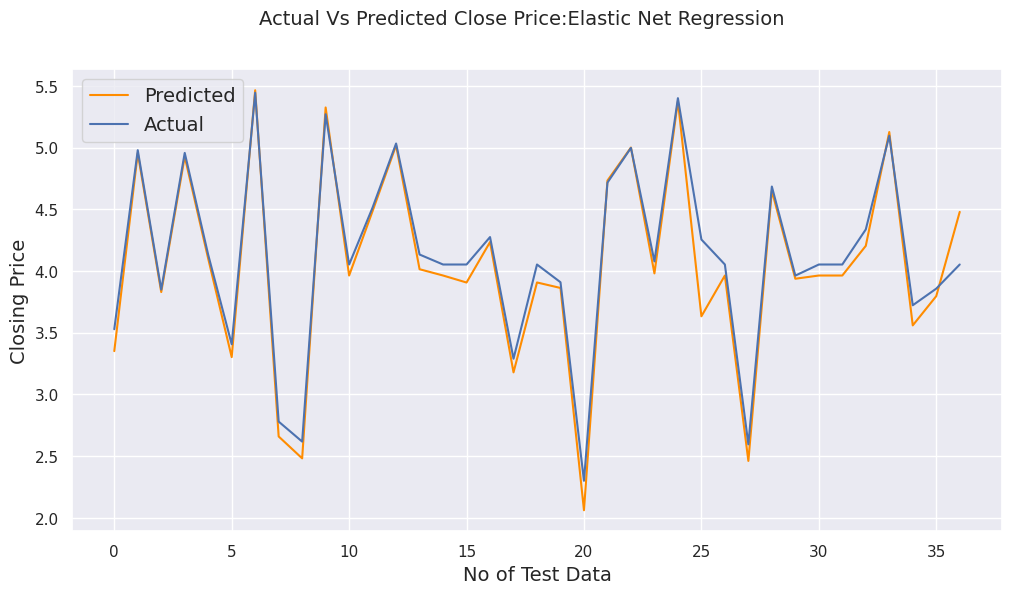

In [80]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_elastic_hyp),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Elastic Net Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the normal Elastic Net regulariztion the accuracy for train and test is 75%
and 77% respectively with RMSE- 0.3589.


But after cross validation with new value of alpha, the train and test accuracy both increases 98% and 95% respectively with RMSE- 0.1559.



##ML-Model-5

In [81]:
random = RandomForestRegressor()
random.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
y_pred_random = random.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest** is a popular machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning family, which combines multiple individual models to create a more powerful and robust predictive model.

The basic idea behind the Random Forest algorithm is to build a "forest" of decision trees and make predictions by aggregating the results of each individual tree. Each decision tree in the forest is constructed using a random subset of the training data and a random subset of the features (input variables). This randomness helps to introduce diversity among the trees and prevents overfitting.

In [83]:
train_accuracy = random.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_random)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_random), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_random)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_random), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_random), 4))

Train accuracy is  0.9968217016191137
 Test accuracy is  0.9638771846412884
MSE value : 0.0208
RMSE value : 0.1441
MAE value : 0.1003
MAPE value : 0.0268


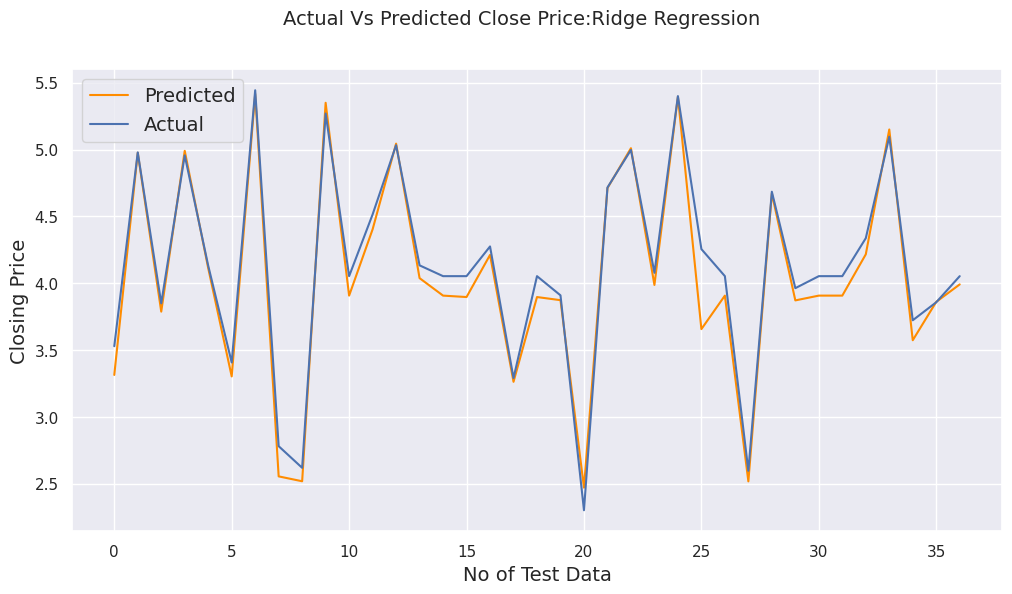

In [84]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_random),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**2. Cross- Validation & Hyperparameter Tuning of Ridge Regularization**

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.


In [85]:
random = RandomForestRegressor()

grid_values = {'n_estimators':[50,80,100],
               'max_depth':[3,5,7]}

random = GridSearchCV(random,param_grid = grid_values,scoring='neg_mean_squared_error',cv=5)

random.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [86]:
random.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [87]:
random_best = RandomForestRegressor(n_estimators=50,max_depth=5)
random_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=50)

In [88]:
y_pred_rand_hyp = random_best.predict(x_test)

In [89]:
train_accuracy = random_best.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_rand_hyp)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_rand_hyp), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_rand_hyp)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_rand_hyp), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_rand_hyp), 4))

Train accuracy is  0.9951471444000668
 Test accuracy is  0.9635511114701863
MSE value : 0.0209
RMSE value : 0.1447
MAE value : 0.1019
MAPE value : 0.0273


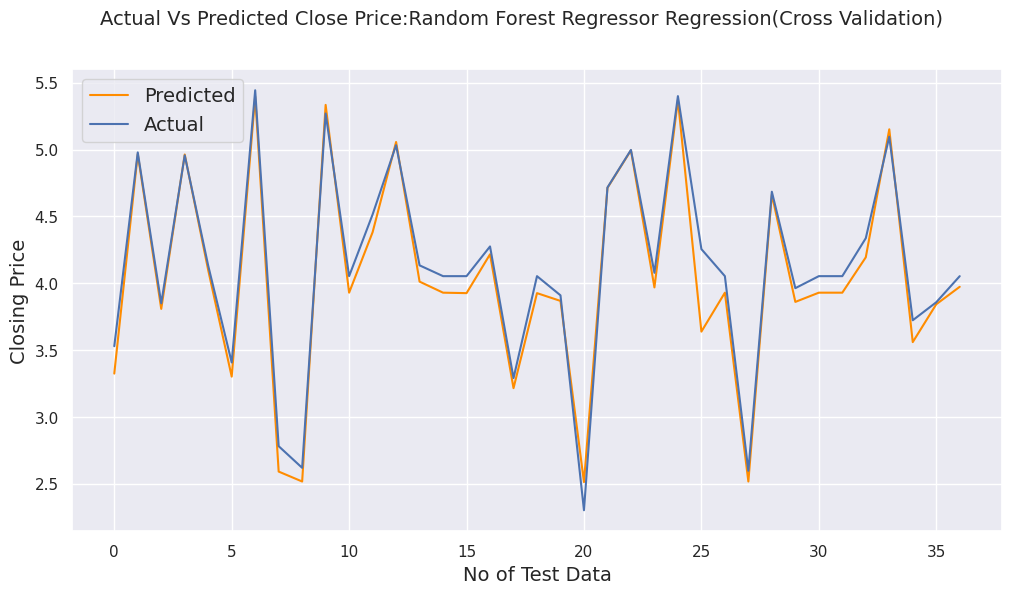

In [90]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_rand_hyp),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:Random Forest Regressor Regression(Cross Validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


In the normal Elastic Net regulariztion the accuracy for train and test is 99%
and 96% respectively with RMSE- 0.1452.


But after cross validation with new value of alpha, the train is remain constant same that is 99 but the test accuracy score is decreases that is 95 with RMSE 0.1563.

##ML-Model-6

In [91]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
y_pred_xgb = xgb.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (eXtreme Gradient Boosting) is an advanced machine learning algorithm that belongs to the gradient boosting family. It is widely used for regression and classification tasks and has gained popularity for its high performance and scalability.The key idea behind XGBoost is to iteratively build an ensemble of weak prediction models, typically decision trees, and combine their predictions to create a strong predictive model. The algorithm optimizes a specific objective function by minimizing the loss during each boosting iteration.

XGBoost is designed to be highly efficient and scalable, making it suitable for large datasets and complex problems.

In [93]:
train_accuracy = xgb.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_xgb)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_xgb), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_xgb)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_xgb), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_xgb), 4))


Train accuracy is  0.9999952156425447
 Test accuracy is  0.9126416593786219
MSE value : 0.0502
RMSE value : 0.224
MAE value : 0.1511
MAPE value : 0.0386


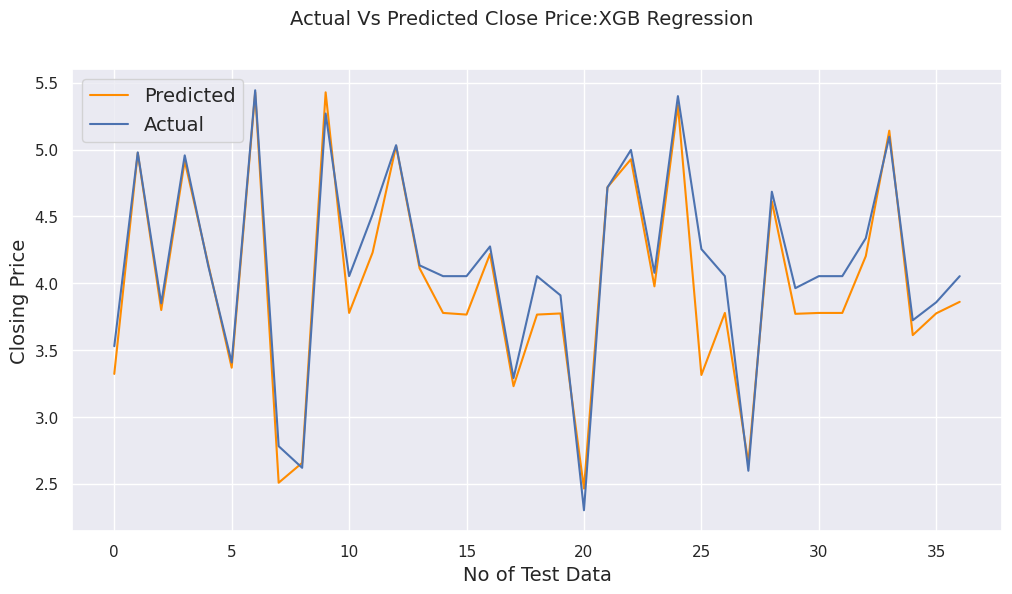

In [94]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_xgb),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:XGB Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**2. Cross- Validation & Hyperparameter Tuning of Ridge Regularization**

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.


In [95]:
xgb_cv = XGBRegressor()
grid_values = {
    'n_estimators': [50, 80, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_cv = GridSearchCV(xgb_cv,param_grid = grid_values,scoring='neg_mean_squared_error',cv = 5 )

xgb_cv.fit(x_train,y_train)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [96]:
xgb_cv.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [97]:
xgb_cv.best_score_

-0.011665785929618144

In [98]:
xgb_best = XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 100)
xgb_best.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
y_pred_xgb_hyp = xgb_best.predict(x_test)

In [100]:
train_accuracy = xgb_best.score(x_train,y_train)
test_accuracy = r2_score(y_test,y_pred_xgb_hyp)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(y_test, y_pred_xgb_hyp), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(y_test, y_pred_xgb_hyp)), 4))
print("MAE value :", round(mean_absolute_error(y_test, y_pred_xgb_hyp), 4))
print("MAPE value :", round(mean_absolute_percentage_error(y_test, y_pred_xgb_hyp), 4))

Train accuracy is  0.9981368007179215
 Test accuracy is  0.9246746912151141
MSE value : 0.0433
RMSE value : 0.208
MAE value : 0.147
MAPE value : 0.0377


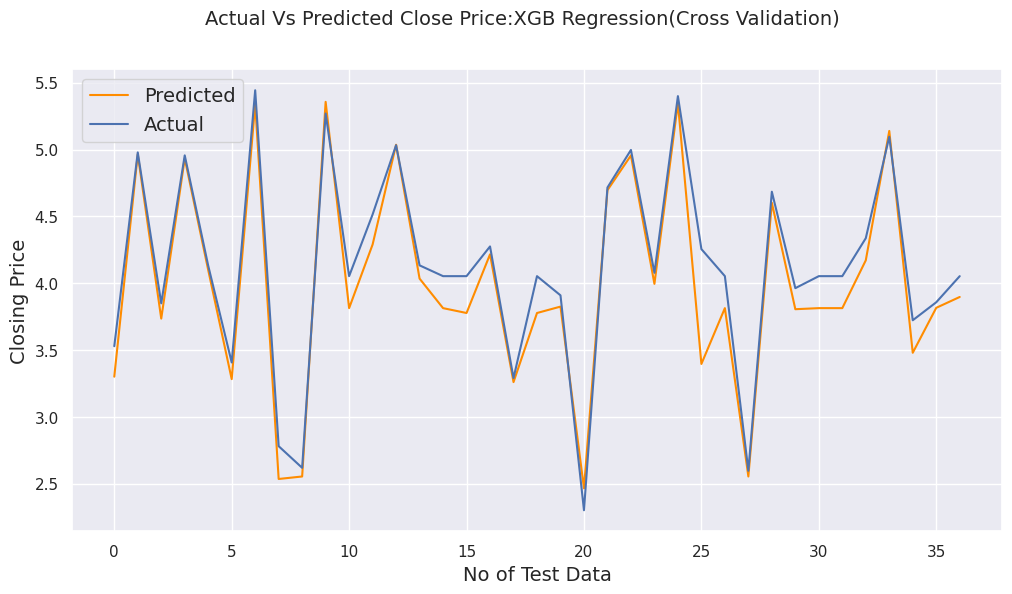

In [101]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_xgb_hyp),color='darkorange')
plt.plot((y_test))
plt.suptitle('Actual Vs Predicted Close Price:XGB Regression(Cross Validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the normal Elastic Net regulariztion the accuracy for train and test is 99%
and 95% respectively with RMSE- 0.1638.


But after cross validation with new value of alpha, the train and test accuracy both increases 99% and 96% respectively with RMSE- 0.1609.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [102]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models

    i=0

    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)

        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)


        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)

        i+=1

    #Sorting values by accuracy
    df.sort_values(by=['RMSE'],ascending=True,inplace=True)

    return df

In [103]:
models=[ reg,lasso,ridge,elastic_net,random,xgb]

In [104]:

#Testing performance
report=score_model(x_train,y_train,x_test,y_test)
report


,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
2,Ridge,0.090,0.019,0.136,2.266,0.968
4,GridSearchCV,0.105,0.021,0.146,2.810,0.963
3,ElasticNet,0.103,0.024,0.156,2.804,0.958
0,LinearRegression,0.131,0.040,0.201,3.534,0.930
1,Lasso,0.131,0.040,0.201,3.527,0.930
5,XGBRegressor,0.151,0.050,0.224,3.857,0.913


As we can see, from the above dataframe, that all models have Rsquare(R2_SCORE) greater than 90%, it means the proportion of variation in the dependent variable is very well explained by the independent variable (i.e. more than 90%) but on the contrary we must take care off the errors occuring in the models as well as how much a model is prone to overfitting. So,by keeping in mind all these perpective I choose RMSE as Error benchmark and the model having least RMSE is Ridge regularization attaning a traning accuracy of 95%.

R2_SCORE AND RMSE are the evaluation metrics which have positive impact on business.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have considered Ridge Reguralization as my final prediction model which has testing accuracy of 98% and training accuracy of 95%, showing least RMSE value among all models and not prone to overfitting. It offers good performance, while also promoting model simplicity and interpretability.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

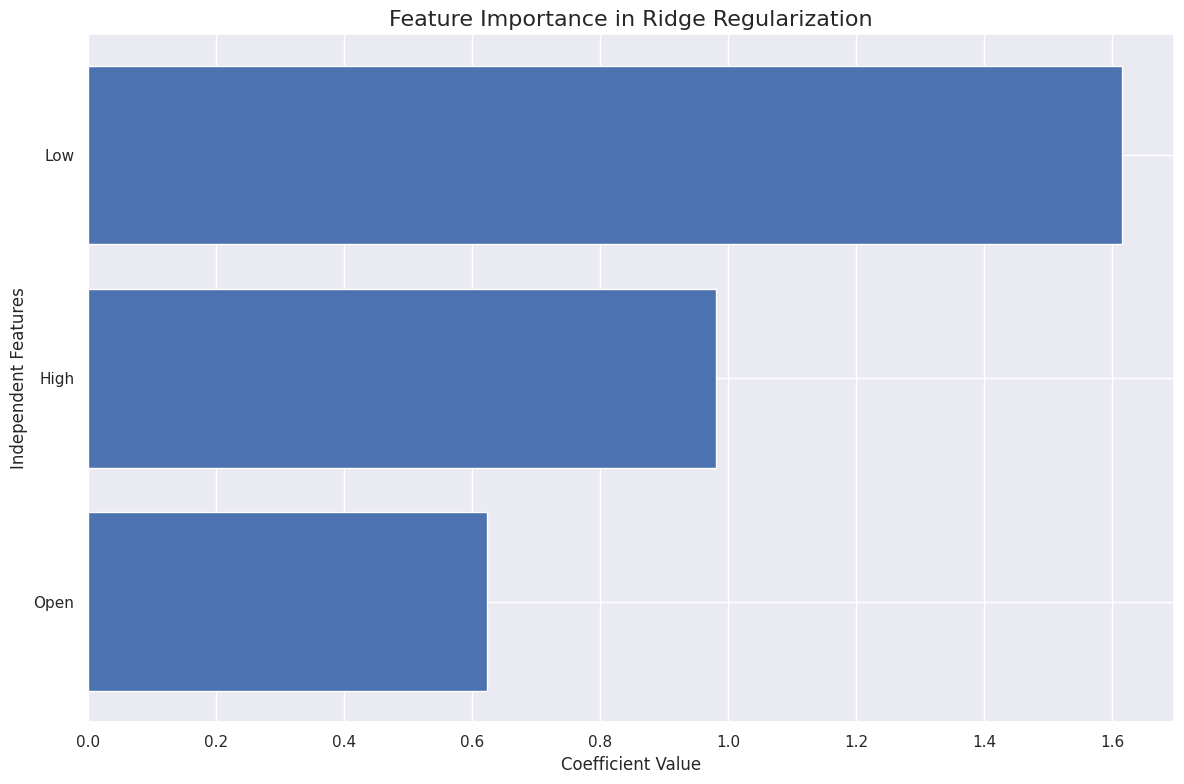

In [105]:
# Retrieve the coefficients (feature weights)
coefficients = ridge.coef_

# Create an array of feature names
feature_names = np.array(['Open','High','Low'])

# Sort the coefficients and corresponding feature names
sorted_features = [feature for _, feature in sorted(zip(coefficients, feature_names))]
sorted_coefficients = np.sort(coefficients)

# Plotting the feature importance
plt.figure(figsize=(12, 8))
bar_width= 0.5
plt.barh(sorted_features, sorted_coefficients)
plt.title("Feature Importance in Ridge Regularization", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Independent Features", fontsize=12)
plt.tight_layout()
plt.show()


**According to the model choosen Low feature is contributing the most.**

# **Conclusion**

Closing Price of a stock refers to the final price at which the stock is traded on a particular stock exchange on a given trading day. It is the last price at which the stock is bought or sold during the trading session.

Importance: The closing price is an important metric used by investors, analysts, and traders to evaluate a company’s financial health, market value, and stock performance. It is also used to calculate other important metrics such as the daily price change, market capitalization, and trading volume.

For an Average Investor: An average investor sees investing in stocks for long-term purposes and in premium stocks that have proved to be quality and high-performing stocks over the years. For such investors, the daily closing price may not hold as high importance as for an average trader.

For a Traders: For traders and analysts, the information on the closing price of stocks is essential to make sure that they make sound trading decisions and maximize returns on their portfolios.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***